<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_01_sklearn_knn_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning PART 1

In [ ]:
from IPython.core.display import display, HTML
# 노트북 컨테이너 크기 조절
display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt !important; line-height: 140%;}</style>"))
# 코드셀 폰트
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

## 0.scikit-learn datasets

- sklearn.datasets
- 빌트인 데이터 셋 : load_XXX()
    - 이미 설치된 데이터 셋
    - **load_boston() : 보스턴 지역 주택 가격, 회귀 용도**
    - **load_breast_cancer()** : 위스콘신 유방암 데이터, 악성/음성 레이블, 분류 용도
    - **load_diabetes() : 당뇨병 환자 데이터, 회귀 용도**
    - **load_digits()** : 손글씨 숫자(0~9) 데이터 셋, 분류 용도
    - **load_iris() : 붓꽃 품종 데이터, 분류 용도**
    - load_linnerud() : 피트니스 클럽 20명 중년 남성 생리학 변수, 회귀 용도
- ```from sklearn.datasets import load_iris```
- ```iris = load_iris()```
    


## 1.머신러닝 데이터셋 가져오기

### 1-01. iris 데이터 가져오기

- sklearn.utils.Bunch : 샘플 데이터 보관 장소
- key-value 쌍, Python의 dict와 유사
- keys() : key 목록 반환
- 공통 key
   - 'data' : 샘플 데이터, Numpy 배열
   - 'target' : 레이블 데이터, Numpy 배열
   - 'target_names' : 레이블 클래스 이름과 의미
   - 'feature_names' : 샘플 데이터 특성 이름, 컬럼 이름
   - 'DESCR' : 데이터 셋에 대한 전체 설명
   - 'filename' : 데이터 저장 파일 위치, csv
- value 접근
   - bunch_obj['key'] 또는 bunch_obj.key

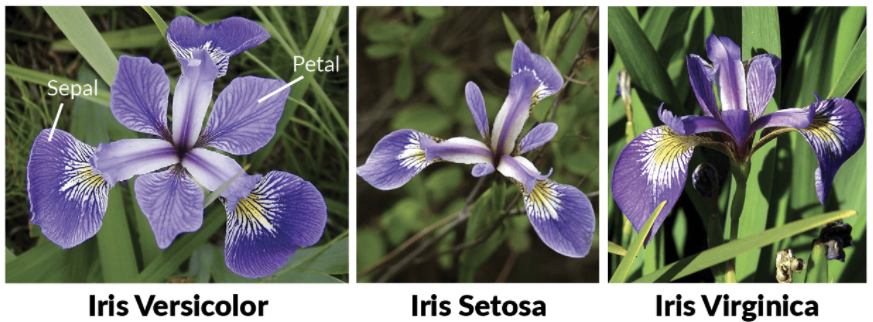


In [ ]:
from sklearn.datasets import load_iris

# datasets에서 load_iris()를 사용하여 iris dataset을 가져와
# iris 이름을 지정한다


In [ ]:
# iris의 type을 확인한다


<class 'sklearn.utils.Bunch'>


In [ ]:
# iris에 포함된 key의 목록을 확인한다


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# iris의 key중에 DESCR을 출력해 '데이터 셋'에 대한 '전체 설명'을 확인한다


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# iris의 샘플 데이터 5개를 출력하여 보자 (ndarray의 indexing 사용)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# data에서 하나의 행(row)이 1개의 instance이다.
# iris 데이터에는 1개의 instance에 4개의 feature 가 있다.

In [ ]:
# iris의 feature_names 속성을 사용해 feature목록을 확인해 보세요.
# sepal : 꽃받침, petal : 꽃잎


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# iris의 샘플 데이터의 크기 정보를 출력하여 보자


(150, 4)

In [ ]:
# iris의 레이블 데이터(target)를 출력하여 보자


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# iris의 target_names 를 확인한다


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# iris의 target_names에 iris.target를 indexer로 사용하여 
# target을 target_name의 내용으로 표시해 본다


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
# iris를 사용하여 DataFrame 생성
import pandas as pd
iris = 

iris_csv.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_csv.to_csv('iris.csv', index=False)

## 2.데이터 셋 분할 (Hold-Out)

### 2-01. 머신러닝의 Training vs Testing
- 머신러닝은 Training 단계와 Testing 단계로 구분됨
- Training 단계 : Training Data와 Learning Algorithm을 가지고 Model을 만듦
- Testing 단계 : Model에 Test Data를 적용하여 결과를 얻음


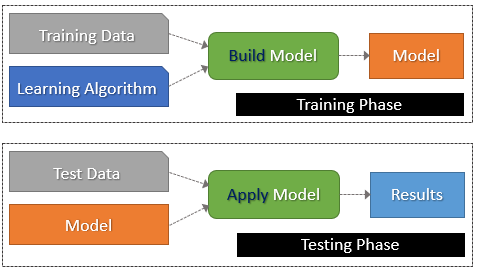

### 2-02. 머신러닝의 Datasets 종류
- Training Set (학습 세트) 
  - 알고리즘이 학습에 사용할 데이터
- Validation Set (검증 세트) 
  - 학습 세트를 사용해 모델을 학습하고 난 뒤,
  - 검증 세트를 사용해 모델의 예측/분류 정확도를 계산
  - Overfitting 을 줄이거나 Parameter 결정에 도움
- Test Set(평가 세트)
  - 모델이 예측/분류해준 값과 실제 값을 비교하여 '모델 성능 평가'
  - 정확도(Accuracy), 정밀도(precision), 재현율(recall), F1 Score 등을 계산
  - 알고리즘이 현실 세계에서 얼마나 잘 수행되는지 이해할 수 있게 됨


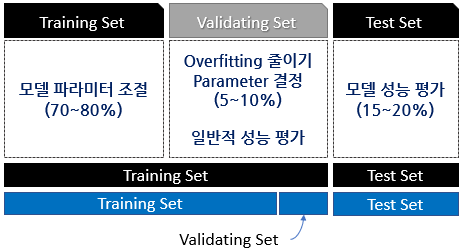

### 2-03. sklearn.model_selection

- X_train, X_test, y_train, y_test = train_test_split(sample, label, test_size, train_size, random_state, suffle, stratify)
   - 같은 크기의 Numpy 배열 2개를 지정된 비율로 나눠서 반환
   - test_size = 0.25 : 0.0~1.0 테스트 데이터셋 비율
   - train_size = None : 0.0~1.0 훈련 데이터셋 비율
   - random_state = None : 정수 값, 난수 발생의 시드(seed) 값
   - suffle = True : boolean 값을 전달해서 섞을지 말지 결정
   - stratify : y의 지정한 데이터 비율을 유지(층화추출), y가 범주형일 때 사용함 
   - 예) 레이블 y가 0,1로 이루어진 binary이고, 비율이 25:75일 때, stratify=y이면 데이터셋도 0,1을 같은 비율로 유지함
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html   

In [ ]:
import pandas as pd 

# iris.csv에서 iris 데이터 가져오기
iris = 
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# iloc을 사용하여 iris 데이터 X, y 분리
X = 
y = 
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
# training, test 세트 나누기
from sklearn.model_selection import train_test_split

# X, y를 사용하여 train_size : test_size 를 0.8 : 0.2로 나누기, random_state = 0 사용
X_train, X_test, y_train, y_test = 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
# random_state를 사용한 경우 - 여러 번 실행해도 동일 결과
X_train, X_test, y_train, y_test = 
display(X_train[:3], X_test[:3])

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2]])

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2]])

In [ ]:
# random_state를 사용하지 않으면 실행시마다 다른 결과 
# train_size 지정하지 않으면 0.75, 0.25
X_train, X_test , y_train, y_test = 
print(X_train.shape, X_test.shape)
display(X_train[:3], X_test[:3])

(112, 4) (38, 4)


array([[6.7, 2.5, 5.8, 1.8],
       [7.4, 2.8, 6.1, 1.9],
       [6.7, 3.1, 4.4, 1.4]])

array([[6. , 2.2, 4. , 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [6.3, 3.4, 5.6, 2.4]])

## 3.kNN (k-Nearest Neighbors)
- 지도 학습
- 주어진 이웃의 개수(k) 만큼 가까운 멤버들과 비교하여 판단하는 방법
  - 개수로 인한 원 안에 새로운 데이터와 가까운 요소의 갯수를 비교
  - 거리 측정 알고리즘 : 유클리드, 맨하튼, Minkowski 거리 등
  - k 값에 따라 소속되는 그룹이 달라질 수 있음
- 데이터의 분포와 상관 없이 사용할 수 있음
- 스케일링이 중요함

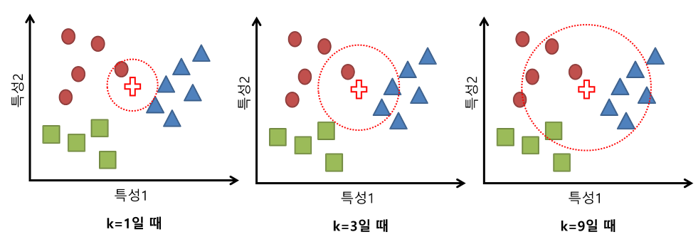

### 3-01. Distance Metric - 그림으로 이해
- 'Minkowski' : p=1 이면 'Manhattan' 거리, p=2 면 'Euclidean' 거리
- 암기법 : 1 Man, 2 E

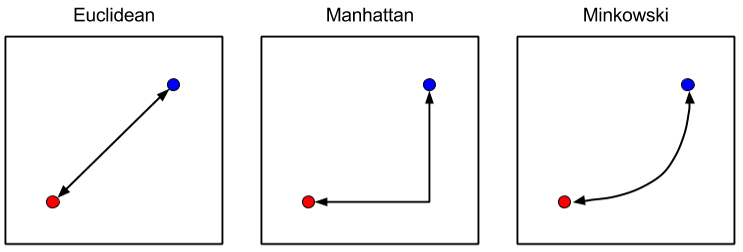
- 출처 : ```https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785882104/6/ch06lvl1sec40/measuring-distance-or-similarity```

### 3-01. 가상 dataset 만들기
- sklearn.datasets
- 가상 데이터 만들기 : make_XXX()
   - 필요에 따라 랜덤한 숫자로 원하는 분포의 가상 데이터 생성
   - make_moons() : 태극 문양 분포의 데이터 생성
   - make_blobs() : 군집을 위한 데이터 무작위 생성
   - make_classification() : 분류를 위한 데이터 생성


- sklearn.datasets.make_blobs()
   - 분류용 가상 데이터 생성, 등방성(모든 방향으로 동일한) 가우시안 정규분포를 이용
   - n_samples=100 : 표본 데이터의 수
   - n_features=2 : 독립 변수의 수(전체 Feature의 수)
   - centers=3: 생성할 클러스터의 수 혹은 센터 -> [cent, n_feature]크기 배열
   - cluster_std=1.0 : 군집의 표준편차
   - random_state: random의 seed
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2개 특성을 가지는 100개 데이터 생성 및 2개의 군집(centers)으로 할당
# X: 독립변수 shape :(n_samples, n_features)  
# y: 종속변수: shape :(n_samples,)  =>  값의 종류 : centers
X, y = make_blobs(n_samples=100, n_features=2, 
                  centers=2, random_state=4)

X.shape, y.shape

((100, 2), (100,))

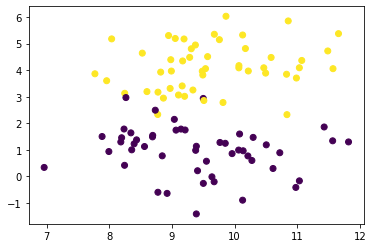

In [ ]:
# 각 특성을 X, Y측으로 지정하여 데이터 시각화
# 동일한 군집은 동일한 색상을 배정
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### 3-02. kNN 수행하기
- sklearn.neighbors.KNeighborsClassifier
   - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
   - 거리를 구하는 방법을 선택할 수 있음, 기본은 'minkowski', p=2 로 'euclidean' 거리, p=1 이면 'Manhattan' 거리
   - 짧은 거리의 노드를 찾는 알고리즘 선택 가능 : algorithm='kd_tree', 'ball_tree', 'brute', 'auto' (default)
   - knn = KNeighborsClassifier(K)
   - knn.fit() : Fit the model using X as training data and y as target values
   - knn.predict() : Predict the class labels for the provided data
   
- kNN의 회귀 모델 : KNeighborsRegressor

In [ ]:
# training, test 세트 나누기
from sklearn.model_selection import train_test_split

# X, y를 사용하여 train_size : test_size 를 0.75: 0.25로 나누기
# random_state = 0 사용
X_train, X_test, y_train, y_test = 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k를 3으로 지정하여 kNN 모델 생성 
model = 
# kNN 모델 학습


KNeighborsClassifier(n_neighbors=3)

In [ ]:
print('학습 데이터 성능 :', ___ )
print('평가 데이터 성능 :', ___ )

학습 데이터 성능 : 0.9733333333333334
평가 데이터 성능 : 0.96


In [ ]:
# 모델예측
print('실제 값 :', ____ )
print('예측 값 :', ____ )

실제 값 : [1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0]
예측 값 : [1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0]


분류 모델의 경우 predict_proba 함수를 이용하여 범주별 예측 확률 계산

In [ ]:
import pandas as pd
proba = 
pd.DataFrame(proba, columns=['0일 확률', '1일 확률']).head()

,0일 확률,1일 확률
0,0.000000,1.000000
1,0.000000,1.000000
2,0.666667,0.333333
3,0.000000,1.000000
4,1.000000,0.000000


## 4.좋은 k 찾기 - 반복문 사용 (iris 데이터)
- 일반적으로 3 ~ 10 사이에서 주로 많이 결정하거나, 학습 데이터의 개수에 제곱근으로 설정
- 최적의 분류 성능을 내는 k 값을 테스트해서 얻어내는 방법이 최선
   - 반복문을 이용하여 테스트
   - hyper parameter를 찾아주는 Tunner 이용 : GridSearch

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# iris.csv에서 iris 데이터 가져오기
iris = 

# iris 데이터를 75%:25%로 분할하여 X_train, X_test, y_train, y_test에 저장한다
# random_state=0 사용


X_train.shape, X_test.shape

((112, 4), (38, 4))

In [ ]:
# n_neighbors를 1 ~ 10 까지 지정하여 KNN 모델을 만들어 x_train, y_train으로 학습시킨 뒤, 
# train 데이터, test 데이터를 사용했을 때의 정확도를 
# model.score(입력, 출력)를 사용하여 구해 train_score, test_score에 저장한다 
k_range = range(1, 11)
train_score = []
test_score = []


In [ ]:
# train_score, test_score 확인 
print(train_score)
print(test_score)

[1.0, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857]
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


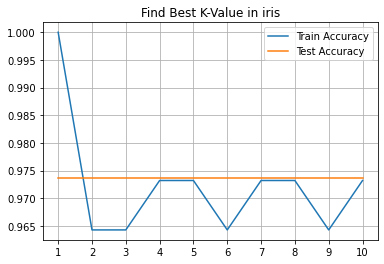

In [ ]:
# train_score, test_score 시각화
import matplotlib.pyplot as plt

# x축을 n_neighbors의 범위(k_range), y축을 정확도(train_score, test_score)로 하는 선 그래프를 2개 그린다   
# plt.plot() 사용
# 선그래프에 범례로 사용될 label은 'Train Accuracy', 'Test Accuracy'로 지정한다 plt.plot()에 함께 지정


# plt.xticks()를 k_range로 지정한다

# 제목을 'Find Best K-Value in iris' 로 지정한다   plt.title() 사용

# legend, grid를 표시한다


plt.show()

In [ ]:
#  그래프에서 최적의 K는 (   )이다

## 5.스케일링 (Scaling)
- 값의 스케일이 다른 두 개의 변수가 있을 때, 이 변수들의 스케일 차이를 제거해 주는 것

### 5-01. 어떤 스케일러를 사용할 것인가?
- 데이터 모델링 전에 '스케일링' 과정이 필요함 
- '스케일링'을 통해 다차원의 값들을 비교 분석하기 쉽게 만듦
- 자료의 오버플로우(overflow), 언더플로우(underflow) 방지
- 독립 변수의 공분산 행렬의 조건수 (condition number)를 감소시켜 최적화 과정에서 안정성 및 수렴 속도를 향상시킴
- 특히 거리 기반 알고리즘에서 '스케일링'은 매우 중요함 
    - 예) kNN, k-means 
- 스케일러 사용 전에 이상치(Outlier)에 대한 제거 필요: 이상치가 스케일링 결과에 영향을 주기 때문임

### 5-02. MinMaxScaler
- 정규화(Nomalization) : 서로 다른 규모의 특징 값을 같은 규모(단위)로 통일시키기 위해 사용하는 방법
- MinMaxScaler : 모든 특징 값을 0 ~1 사이로 변환, 표준 정규분포 
- sklearn.preprocessing.MinMaxScaler(feature_range)
   - feature_range = (0, 1)
   - 정규화 목표 구간 : tuple => (min, max)
   - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

In [ ]:
# 식에 의한 정규화 : min,max 스케일링
(arr - arr.min()) / (arr.max() - arr.min())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler에 의한 스케일링 
mm_scaler = 
scaled = 
scaled

array([[0.  ],
       [0.75],
       [1.  ]], dtype=float32)

### 5-03. iris 스케일링 - MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler를 사용하여 X_train, X_test 스케일링 
# X_train : fit_transform
# X_test : transform
scaler = 
X_train_sc = 
X_test_sc = 

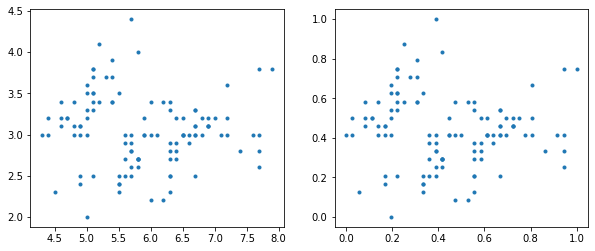

In [ ]:
# 그래프를 사용해 분포를 확인합니다
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(X_train.iloc[:, 0], X_train.iloc[:, 1], '.')
plt.subplot(1, 2, 2)
plt.plot(X_train_sc[:, 0], X_train_sc[:, 1], '.')
plt.show()

In [ ]:
# kNN 모델 학습 및 평가
from sklearn.neighbors import KNeighborsClassifier

# k(= n_neighbors)를 3으로 지정하여 kNN 모델 생성 및 학습
model = 
# kNN 모델 평가
print('학습 데이터 성능 :', ___ )
print('평가 데이터 성능 :', ___ )

학습 데이터 성능 : 0.9732142857142857
평가 데이터 성능 : 0.9736842105263158


### 5-04. StandardScaler 
- **표준화(Standardization)** : 표준 정규 분포가 되도록 스케일링함
- 표준 정규 분포(Standard Normal Distribution) : 평균이 0 이고 표준편차가 1인 가우시안 분포
- sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- StandardScaler.fit() : Compute the mean and std to be used for later scaling
- StandardScaler.transform() : Perform standardization by centering and scaling
- StandardScaler.fit_transform() : Fit to data, then transform it

### 5-05. iris 스케일링 - StandardScaler

In [ ]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

array([ 2.,  8., 10.], dtype=float32)

In [ ]:
# arr의 평균, 표준편차 구하기
arr.mean(), arr.std()

(6.6666665, 3.3993464)

In [ ]:
# 식에 의한 표준화 : arr에서 arr의 평균을 뺀것을 arr의 표준편차로 나누어서 하게 됨
brr = (arr - arr.mean()) / arr.std()
brr

array([-1.3728129 ,  0.39223233,  0.98058075], dtype=float32)

In [ ]:
# brr의 평균, 표준편차 구하기
brr.mean(), brr.std()

(5.9604645e-08, 1.0)

In [ ]:
# iris 데이터를 StandardScaler로 스케일링 하세요
from sklearn.preprocessing import StandardScaler
# StandardScaler를 사용하여 X_train, X_test 스케일링 
# X_train : fit_transform
# X_test : transform
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

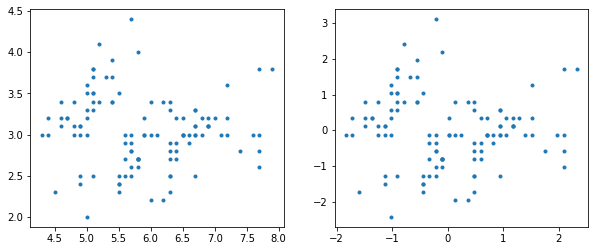

In [ ]:
# 그래프를 사용해 분포를 확인합니다
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(X_train.iloc[:, 0], X_train.iloc[:, 1], '.')
plt.subplot(1, 2, 2)
plt.plot(X_train_sc[:, 0], X_train_sc[:, 1], '.')
plt.show()

In [ ]:
# kNN 모델 학습 및 평가
from sklearn.neighbors import KNeighborsClassifier

# k(= n_neighbors)를 3으로 지정하여 kNN 모델 생성 및 학습
model = 
# kNN 모델 평가
print('학습 데이터 성능 :', ___ )
print('평가 데이터 성능 :', ___ )

학습 데이터 성능 : 0.9732142857142857
평가 데이터 성능 : 0.9736842105263158


## 6.이상치(Outlier) 처리

In [ ]:
# iris.csv 가져와 X, y 분리하기
iris = pd.read_csv('iris.csv')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [ ]:
# X의 통계치 확인
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# 데이터 분할 0.75:0.25, random_state=0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
[ x.shape for x in [X_train, X_test, y_train, y_test]]

[(112, 4), (38, 4), (112,), (38,)]

### 6-01. boxplot을 이용한 이상치 확인

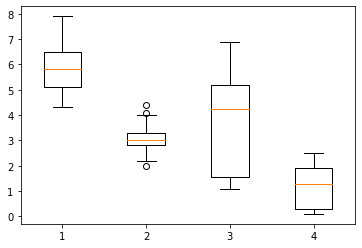

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(X_train.values)
plt.show()

### 6-2. IQR 계산

In [ ]:
# Q1 - 1.5*IQR, Q3 + 1.5*IQR

In [ ]:
# X_train의 'sepal width (cm)'에 대한 Outlier의 MIN, MAX 구하기
Q1, Q3 = 
IQR = 
MIN = 
MAX = 
print(MIN, MAX)

2.05 4.05


In [ ]:
# outlier 데이터 확인
condition1 = 
condition2 = 
outlier = 
outlier

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1


In [ ]:
# outlier 제거 (DataFrame.drop 사용)
X_train = 
y_train = 

In [ ]:
# kNN 모델 학습 및 평가
from sklearn.neighbors import KNeighborsClassifier

# k(= n_neighbors)를 3으로 지정하여 kNN 모델 생성 및 학습
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
# kNN 모델 평가
print('학습 데이터 성능 :', model.score(X_train, y_train) )
print('평가 데이터 성능 :', model.score(X_test, y_test) )

학습 데이터 성능 : 0.963302752293578
평가 데이터 성능 : 0.9736842105263158


## 7.Grid Search
- 모델에 가장 적합한 하이터 파라미터(hyper parameter)를 찾기 위해 사용
-  일반화 성능 향상을 통해 과대적합 현상 개선할 수 있기 때문에 모델의 Hyper 
Parameter 튜닝은 중요함
- 최적의 Hyper Parameter 튜닝을 위해서는 실험 가능한 모든 조합을 학습하고
평가가 필요

- sklearn.model_selection.GridSearchCV(estimator, param_grid)
  - estimator : estimator object
  - param_grid : dict, estimetor 튜닝을 위해 시도할 파라미터 이름과 값
  - cv : cross validation, the default 5-fold cross validation

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 7-01. 데이터 가져오기

In [ ]:
# digits dataset을 사용하여 실습을 준비합니다
from sklearn.datasets import load_digits
digits = load_digits()
digits_csv = pd.DataFrame(digits.data)
digits_csv['class'] = digits.target
digits_csv.to_csv('digits.csv', index=False)

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# digits.images shape 확인
display(digits.images.shape, digits.images[0].shape, digits.images[0])

(1797, 8, 8)

(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

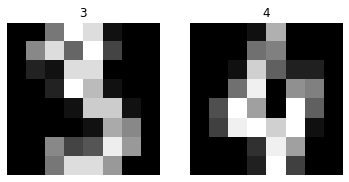

In [ ]:
# plt.imshow를 사용하여 그림 확인하기
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(digits.images[3], cmap='gray')
plt.title(digits.target[3])
plt.axis('off')
plt.subplot(122)
plt.imshow(digits.images[4], cmap='gray')
plt.title(digits.target[4])
plt.axis('off')
plt.show()

In [ ]:
# digits.csv 읽어 DataFrame으로 가져오기
import pandas as pd
digits = pd.read_csv('digits.csv')

In [ ]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### 7-02. Grid Search 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성
model =    # hyper parameter를 넣지 않음

# 파라미터를 딕셔너리 형태로 제공 (Key값 틀리면 ValueError 발생)
# n_neighbors에 대해 1 ~ 9값 사용하기
params = {  }

X = digits.iloc[:, :-1]
y = digits.iloc[:, -1]

# GridSearchCV 모델 생성 후, fit
gs = ____

In [ ]:
# Grid Search 결과 조회
# GridSearchCV 결과를 추출해 보기 편하게 DataFrame으로 변환
report = pd.DataFrame(gs.cv_results_)
report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008998,0.000288,0.070100,0.001315,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.009099,0.000471,0.075923,0.002214,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.009255,0.000659,0.074453,0.002481,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.983287,0.966574,0.966065,0.009668,2
3,0.008866,0.000060,0.075019,0.001101,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.008834,0.000111,0.074888,0.002783,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.009470,0.001081,0.075535,0.002026,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.009396,0.001041,0.076027,0.001743,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.008852,0.000128,0.074825,0.001653,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,8
8,0.008848,0.000207,0.074866,0.000983,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9


In [ ]:
# 최고 성능 결과 조회

## 최고 정확도, 최적 파라미터, 최적 모델 출력
print(f'GridSearchCV의 최고 정확도\n{gs.best_score_:.4f}\n')
print(f'GridSearchCV의 최적 파라미터\n{gs.best_params_}\n')
print(f'GridSearchCV의 최적 모델\n{gs.best_estimator_}.')

GridSearchCV의 최고 정확도
0.9672

GridSearchCV의 최적 파라미터
{'n_neighbors': 2}

GridSearchCV의 최적 모델
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform').


## 8.교차 검증(Cross Validation)
- 고정적인 학습 데이터 세트로 모델을 만드는 경우 과대적합이 발생할 수 있음
- 새로운 데이터에 대해서도 충분한 정확도를 확보하기 위해서는 과대적합을 제어할 수 있어야 함
- 교차 검증을 통해 문제 해결 가능
- 데이터가 순차적으로 들어가 있는 경우 shuffle을 하지 않는 경우 성능이 매우 나쁨

- cross_val_score 함수: 교차 검증으로 점수 평가
- cross_val_predict 함수 : 교차 검증 된 예측값 생성

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model, X, y, cv=5)

### 8-02. K-Fold Cross Validation
- 데이터를 동일한 개수인 K개의 Fold로 분할
  - K번 학습을 진행하며 매 학습마다 사용되는 Fold를 변경하면서 학습 및 평가
  - 모든 데이터를 학습과 평가에 쓸 수 있고 과대적합의 염려도 크지 않지만 시간이 다소 오래 걸린다는 단점이 존재
- K-Fold는 최적의 파라미터를 구하기 위한 모델 튜닝에서 주로 사용됨
  - 분류 모델인 경우 층화추출(Stratified)로 K-Fold를 샘플링 하면 모델의 성능을 조금 더 개선할 수 있음
- scikit-learn의 model_selection.KFold를 이용


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
# 5개 Fold로 나누는 경우
x = np.arange(10)
fold = KFold(n_splits=5)
for train, test in fold.split(x):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [ ]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [ ]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=3)
#fold = KFold(n_splits=3, shuffle=True)
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
for train, test in fold.split(X):    
    print(len(train), X.iloc[train, :].head(4), sep='\n')
    print(len(test), X.iloc[test, :].head(4), sep='\n')
    print('-' * 100)
for train, test in fold.split(y):    
    print(len(train), y.iloc[train].head(4), sep='\n')
    print(len(test), y.iloc[test].head(4), sep='\n')
    print('-' * 100)

100
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
50
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
----------------------------------------------------------------------------------------------------
100
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5         

## 9.Self Study - KNN
Q 다음의 데이터 세트에 K-NN 모델을 적용하세요.
- 학습 데이터 70%, 평가 데이터 30%로 분할하세요.
- 최적의 K 값을 찾아주세요.

In [ ]:
from sklearn.datasets import load_breast_cancer

# cancer라는 이름에 암 데이터셋을 가져오기 합니다.
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.to_csv('breast_cancer.csv', index=False)

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# cancer의 target_names를 확인합니다.
# malignamt : 악성, benign : 양성
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer = pd.read_csv('breast_cancer.csv')
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# cancer에 대한 정답(class)을 확인합니다.
cancer['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [ ]:
# 스케일링

# 데이터 분할
# 데이터 분할 시 stratify=cancer['class']를 사용해 봅니다.



# 모델 평가(최적의 K값 테스트)

## 10.Log Transformation
- 데이터의 분포가 극단적으로 모였을 때 로그 변환을 적용하여 왜도(skewness)를
제거할 수 있음
  - 이외에도 루트(sqrt) 변환, Box-Cox 변환을 사용할 수 있음
  - 적용 예) 로그인 빈도, 제품 판매량, 검색 단어, 친구 수등
- 대부분의 머신러닝 모델은 특정 분포를 따른다는 가정을 기반으로 함
  - 선형 모델의 경우 정규분포와 유사한 경우 성능이 높아지는 것으로 알려져 있음
- 로그 변환 시 데이터가 0인 경우 –inf로 변환되어 학습 시 문제가 발생할 수 있음
  - np.log 함수가 아니라 np.log1p 함수를 이용하여 해결 가능
  - 원래 값으로 변환하기 위해서 np.expm1 함수를 사용
  - np.log1p : log(1 + x)
  - np.expm1 : exp(x) - 1

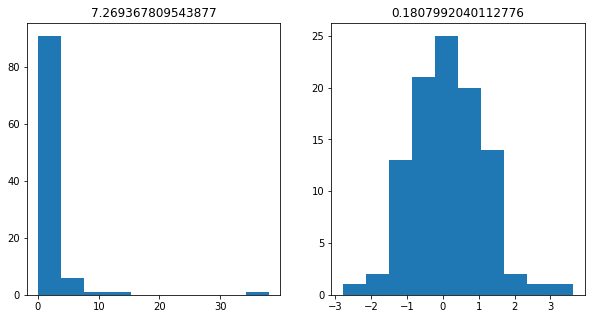

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

x = np.random.RandomState(2021).lognormal(size=(100))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x)
plt.title(f'{skew(x)}')

plt.subplot(1, 2, 2)
plt.hist(np.log(x))
plt.title(f'{skew(np.log(x))}')
plt.show()

In [ ]:
x[:10]

array([4.43092804, 1.96601936, 0.65806513, 0.44640851, 1.7434673 ,
       0.49385946, 3.09831453, 1.90599053, 1.11228198, 1.52524466])

In [ ]:
np.expm1(np.log1p(x))[:10]

array([4.43092804, 1.96601936, 0.65806513, 0.44640851, 1.7434673 ,
       0.49385946, 3.09831453, 1.90599053, 1.11228198, 1.52524466])